In [9]:
import polars as pl, seaborn as sns, pathlib

# Day 7

In [2]:
df=pl.read_csv('input/7.txt',has_header=False,separator=':')
df=df.with_columns(pl.col('column_2').str.strip_prefix(' ').str.split(' ')).with_columns(pl.col('column_2').list.len().alias('col2len'))

column_1,column_2,col2len
i64,list[str],u32
7628244,"[""4"", ""6"", … ""321""]",5
1961493912,"[""729"", ""232"", … ""9""]",7
79325232924618,"[""907"", ""466"", … ""618""]",6
5036760,"[""5"", ""647"", … ""8""]",10
152117,"[""5"", ""75"", … ""162""]",6
…,…,…
55225476873,"[""685"", ""1"", … ""873""]",7
1721520,"[""456"", ""6"", … ""797""]",5
1454758,"[""16"", ""96"", … ""50""]",6


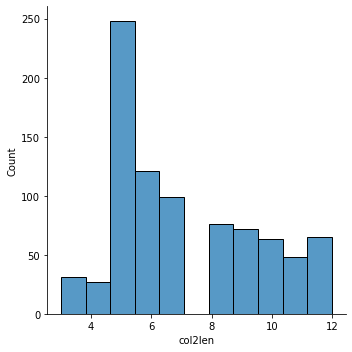

In [3]:
sns.displot(x=df['col2len'])

In [4]:
df['col2len'].max()

12

# Day 9

In [18]:
i=pathlib.Path('input/9.txt').read_text().strip()
len(i),sum(map(int,i))

(19999, 94570)

```
          1         2
0123456789012345678901234567

0099811188827773336446555566
```

In [22]:
ex=[int(e) for e in '0099811188827773336446555566'];

In [25]:
sum(i*ch for i, ch in enumerate(ex))

1928

In [31]:
checksum=0
for i, ch in enumerate(ex):
    checksum+=i*ch
    print(f"{i=} {ch=} {i*ch=} {checksum=}")

i=0 ch=0 i*ch=0 checksum=0
i=1 ch=0 i*ch=0 checksum=0
i=2 ch=9 i*ch=18 checksum=18
i=3 ch=9 i*ch=27 checksum=45
i=4 ch=8 i*ch=32 checksum=77
i=5 ch=1 i*ch=5 checksum=82
i=6 ch=1 i*ch=6 checksum=88
i=7 ch=1 i*ch=7 checksum=95
i=8 ch=8 i*ch=64 checksum=159
i=9 ch=8 i*ch=72 checksum=231
i=10 ch=8 i*ch=80 checksum=311
i=11 ch=2 i*ch=22 checksum=333
i=12 ch=7 i*ch=84 checksum=417
i=13 ch=7 i*ch=91 checksum=508
i=14 ch=7 i*ch=98 checksum=606
i=15 ch=3 i*ch=45 checksum=651
i=16 ch=3 i*ch=48 checksum=699
i=17 ch=3 i*ch=51 checksum=750
i=18 ch=6 i*ch=108 checksum=858
i=19 ch=4 i*ch=76 checksum=934
i=20 ch=4 i*ch=80 checksum=1014
i=21 ch=6 i*ch=126 checksum=1140
i=22 ch=5 i*ch=110 checksum=1250
i=23 ch=5 i*ch=115 checksum=1365
i=24 ch=5 i*ch=120 checksum=1485
i=25 ch=5 i*ch=125 checksum=1610
i=26 ch=6 i*ch=156 checksum=1766
i=27 ch=6 i*ch=162 checksum=1928
